# Gradient Descent for Polynomial Regression
**Author:** Dr. Rishikesh Yadav / Vedant Vibhor 

## Introduction

In this notebook, we demonstrate the implementation of a gradient descent algorithm for polynomial regression. Our goal is to fit a polynomial model to synthetic data and visualize the results. We will cover the following steps:

1. Defining the loss function and its gradient
2. Implementing the gradient descent algorithm
3. Generating synthetic data
4. Running the gradient descent and visualizing the results

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set matplotlib to inline for Jupyter notebooks
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

## Define the Loss Function and Gradient

In [2]:
def predict_poly(X, w, degree):
    """
    Compute polynomial predictions for input X.
    X: 1D numpy array of input features
    w: coefficients (numpy array of length degree+1)
    degree: degree of the polynomial
    Returns: predicted y values (numpy array)
    """
    # Sum w[j] * X**j for j in 0..degree
    return sum(w[j] * (X ** j) for j in range(degree + 1))

def loss_function_poly(w, X, y, degree):
    """
    Compute Mean Squared Error loss for polynomial regression.
    w: coefficients
    X: input features
    y: true target values
    degree: degree of the polynomial
    Returns: mean squared error (float)
    """
    y_pred = predict_poly(X, w, degree)
    return np.mean((y - y_pred) ** 2)

def gradient_poly(w, X, y, degree):
    """
    Compute gradient of the loss function w.r.t. each coefficient.
    Returns: numpy array of gradients (length degree+1)
    """
    y_pred = predict_poly(X, w, degree)
    # For each coefficient w_j, compute gradient: -2 * mean((y - y_pred) * X**j)
    return np.array([-2 * np.mean((y - y_pred) * (X ** j)) for j in range(degree + 1)])

## Gradient Descent Algorithm

In [3]:
def gradient_descent_poly(X, y, learning_rate, iterations, degree):
    """
    Perform gradient descent to fit a polynomial regression model.
    X: input features (numpy array)
    y: target values (numpy array)
    learning_rate: step size for updates
    iterations: number of iterations
    degree: degree of the polynomial
    Returns: DataFrame with columns for iteration, loss, and all coefficients
    """
    w = np.zeros(degree + 1)  # Initialize all coefficients to zero
    # Prepare history dictionary to store loss and coefficients at each step
    history = {
        'iteration': [],
        'loss': [],
        **{f'w{j}': [] for j in range(degree + 1)}
    }
    for i in range(iterations):
        # Compute gradients for all coefficients
        grads = gradient_poly(w, X, y, degree)
        # Update coefficients using gradient descent
        w -= learning_rate * grads
        # Compute current loss
        loss = loss_function_poly(w, X, y, degree)
        # Record iteration, loss, and all coefficients
        history['iteration'].append(i + 1)
        history['loss'].append(loss)
        for j in range(degree + 1):
            history[f'w{j}'].append(w[j])
    # Convert history to DataFrame for analysis/plotting
    return pd.DataFrame(history)

## Generate Synthetic Data

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# True coefficients for the polynomial: y = w0 + w1*x + w2*x^2 + w3*x^3 + noise
w_true = [1, -1, 2.1, -2]
degree = 3  # Degree of the polynomial
n = 1000    # Number of data points

# Generate input features from a standard normal distribution
X = np.random.normal(0, 1, n)

# Generate target values using the true polynomial plus Gaussian noise
y = sum(w * (X ** j) for j, w in enumerate(w_true)) + np.random.normal(0, np.sqrt(3), n)

print(f"Generated {n} data points with polynomial coefficients: {w_true}")

Generated 1000 data points with polynomial coefficients: [1, -1, 2.1, -2]


## Scatter Plot of the Data

We visualize the generated synthetic data with a scatter plot.

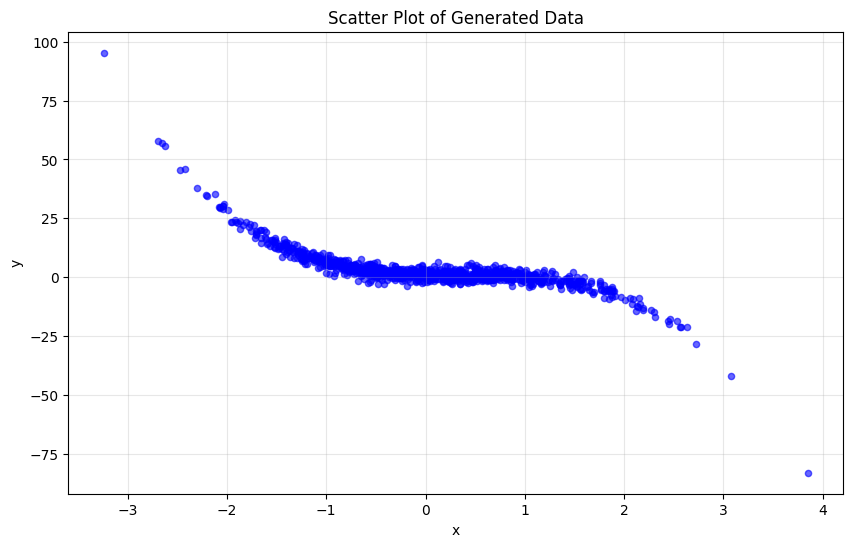

In [5]:
# Create scatter plot of the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Generated Data')
plt.grid(True, alpha=0.3)
plt.show()

## Perform Gradient Descent

In [6]:
# Set hyperparameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Run gradient descent to fit the polynomial regression model
history = gradient_descent_poly(X, y, learning_rate, iterations, degree)

# Extract final estimated coefficients
final_coeffs = history.iloc[-1][[f'w{j}' for j in range(degree + 1)]]

# Print final estimated coefficients and compare with true values
print("\nFinal coefficients after gradient descent:")
for j, (true, est) in enumerate(zip(w_true, final_coeffs)):
    print(f"  w{j}: {est:.3f} (true: {true})")


Final coefficients after gradient descent:
  w0: 1.093 (true: 1)
  w1: -1.111 (true: -1)
  w2: 2.131 (true: 2.1)
  w3: -1.988 (true: -2)


## Visualize the Results

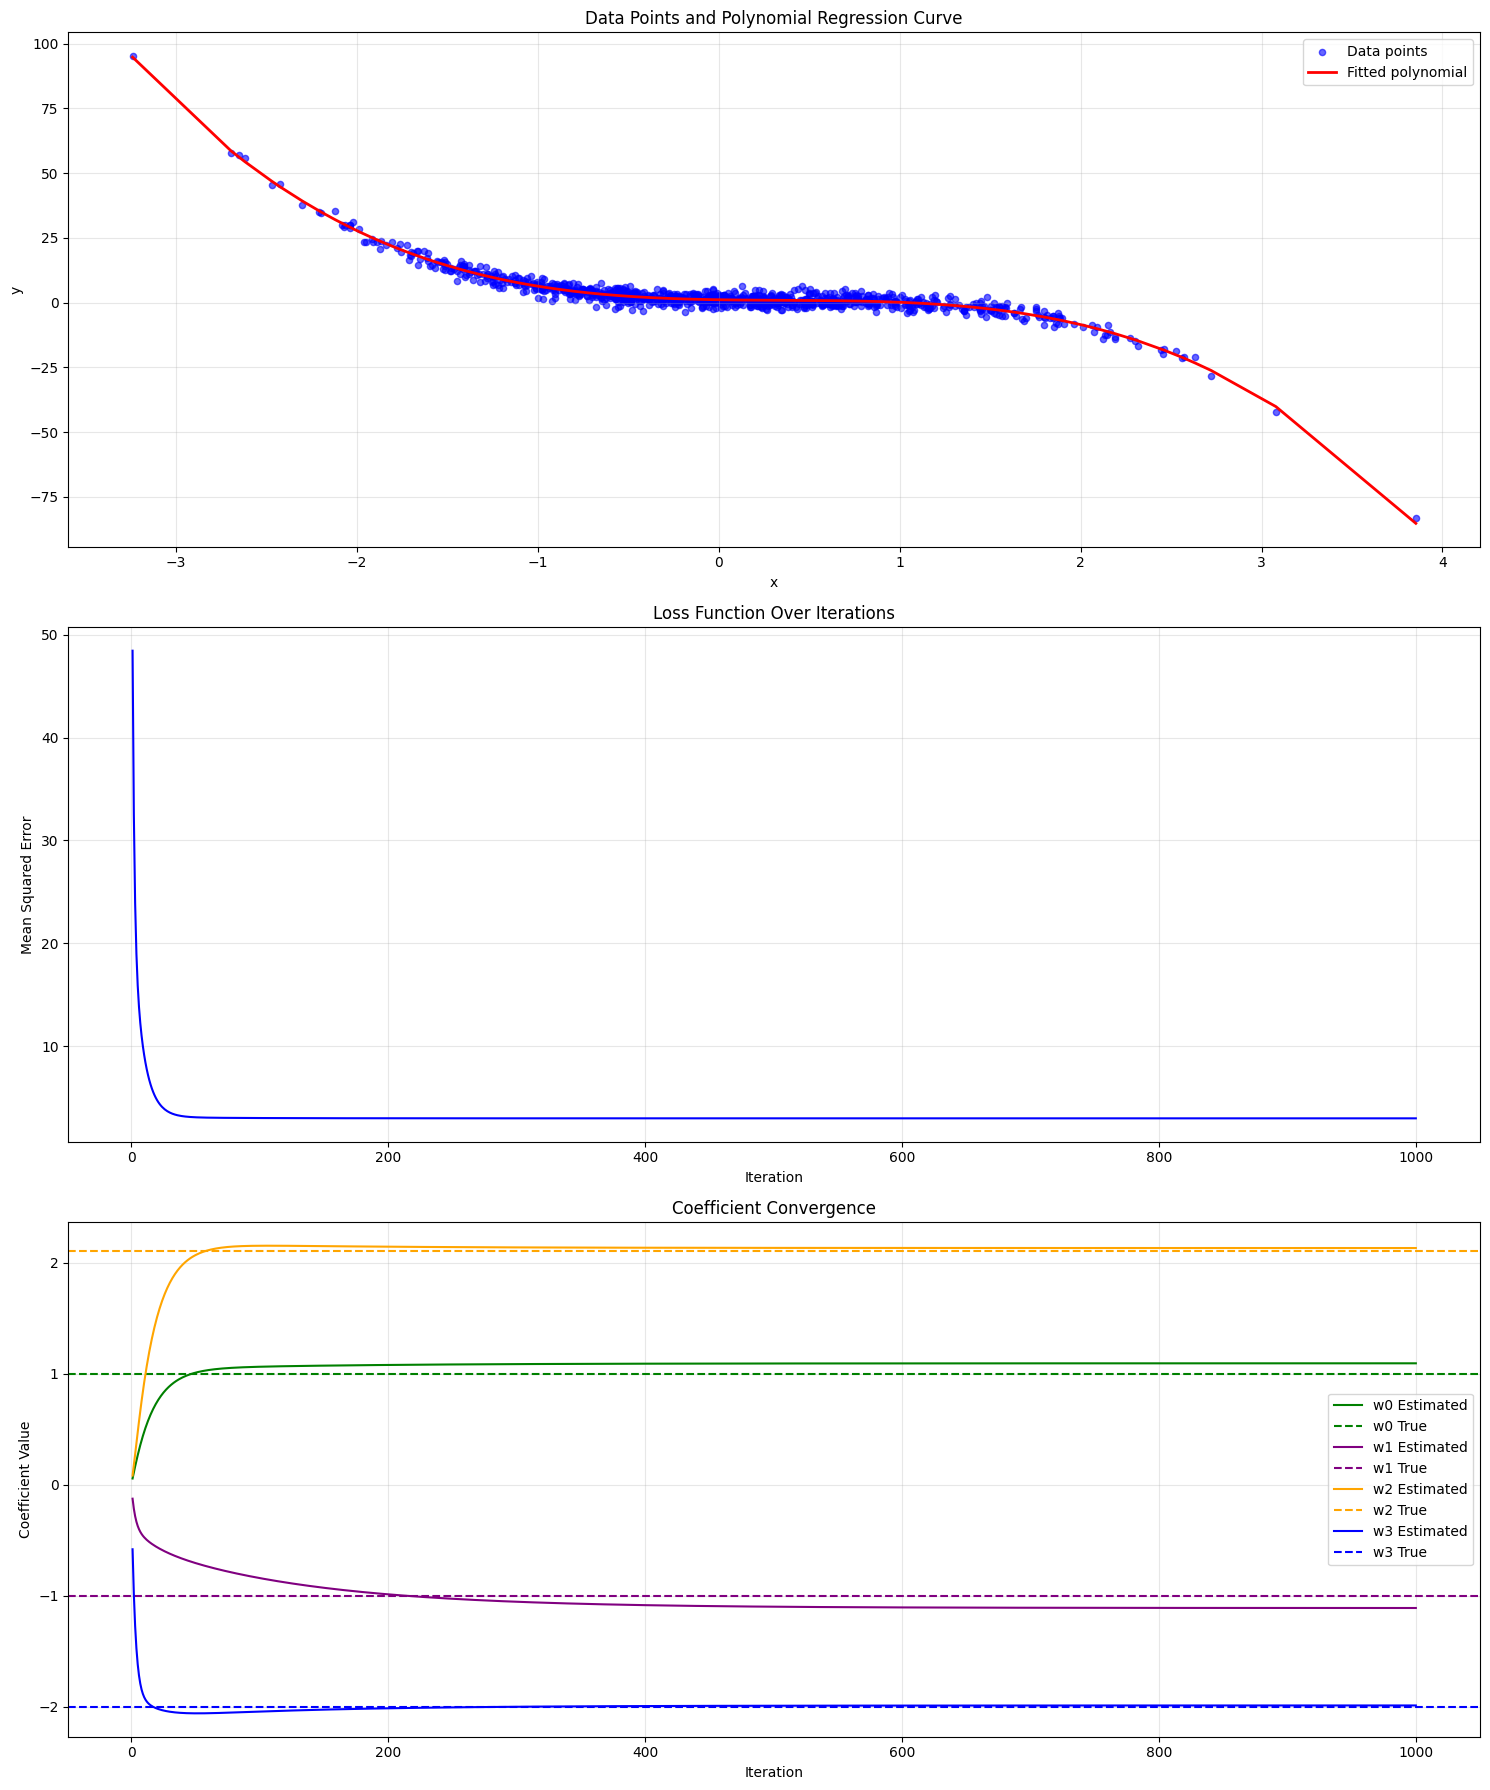

In [7]:
# Create a figure with 3 vertically stacked subplots
fig = plt.figure(figsize=(15, 18))

# --- Plot 1: Data points and regression curve ---
plt.subplot(3, 1, 1)
# Scatter plot of all data points
plt.scatter(X, y, alpha=0.6, color='blue', s=20, label='Data points')
# Sort X for smooth curve plotting
X_sorted = np.sort(X)
# Predict using final coefficients
y_pred = predict_poly(X_sorted, final_coeffs.values, degree)
# Plot regression curve
plt.plot(X_sorted, y_pred, color='red', linewidth=2, label='Fitted polynomial')
plt.title('Data Points and Polynomial Regression Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Plot 2: Loss function over iterations ---
plt.subplot(3, 1, 2)
plt.plot(history['iteration'], history['loss'], color='blue')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

# --- Plot 3: Coefficient convergence ---
plt.subplot(3, 1, 3)
colors = ['green', 'purple', 'orange', 'blue']  # One color for each coefficient
for j in range(degree + 1):
    # Plot estimated coefficient over iterations
    plt.plot(history['iteration'], history[f'w{j}'], color=colors[j], label=f'w{j} Estimated')
    # Plot true value as dashed line
    plt.axhline(w_true[j], color=colors[j], linestyle='--', label=f'w{j} True')
plt.title('Coefficient Convergence')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we implemented and visualized gradient descent for polynomial regression.  
We defined the loss and gradient, generated synthetic data, fit the model using gradient descent, and visualized the learning process and results.